<a href="https://colab.research.google.com/github/enriqueasegura/Exercises/blob/master/HW2_PHY_4200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt


We want to solve the differential equation
            df/dx = 2 + exp(x),    f(0) = 1

in the interval [0, 1]. 
1. Divide the interval into N divisions, x0 = 0, x1 = h = 1/N, x2 = 2h = 2/N, …, xN = Nh/N = 1, and use df/dx = [f(x+h) –f(x)]/h to determine the value of f(x) at x1, x2, …, xN. 
2. Calculate the error: assume the exact solution is F(x), and define the error as sum over i from 0 to N of |f(xi) – F(xi)|/N. 
3. Do the calculation for N = 10, 20, 30, …, 200 and plot the error as a function of N.

#Solution

We are going to use the Euler method since this is clearly a suitable solution for this problem. 

However, let's get what the actual solution should be: 

$F(x) = \int 2 + e^x dx  = 2x + e^x $

So let's get a plot of what that should look like:

In [0]:
import matplotlib
"""
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

matplotlib.font_manager._rebuild()
matplotlib.rc('font', family='TH Sarabun New')
"""



"\n!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf\n\nmatplotlib.font_manager._rebuild()\nmatplotlib.rc('font', family='TH Sarabun New')\n"

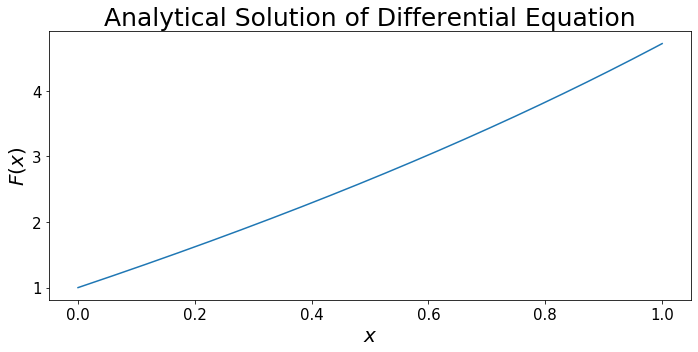

In [0]:
steps = 1000

x_arr = np.linspace(0,1, steps)

plt.figure(figsize=(10,5))

analytical_solution = np.multiply(2, x_arr) + np.exp(x_arr)

plt.plot(x_arr, analytical_solution, label='Analytical')

plt.tick_params(axis='both', labelsize=15)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$F(x)$', fontsize=20)

plt.title('Analytical Solution of Differential Equation', fontsize=25)

plt.tight_layout()

In [0]:
#implementing euler method 

def f(x):
  return 2 + np.exp(x)


def euler(x0, f0, num_steps):
  #where we keep the numerical solution
  x_arr = np.zeros(num_steps)
  f_arr = np.zeros(num_steps)
  h = np.divide(1, num_steps)

  #seed initial conditions
  x_arr[0] = x0
  f_arr[0] = f0


  for i in range(1, num_steps):
    x_arr[i] = x_arr[i-1] + h
    f_arr[i] = f_arr[i-1] + h*f(x_arr[i-1]) 

  return x_arr, f_arr

In [0]:
x0 = 0
f0 = 1
num_steps = 1000
lower_bound = 0
upper_bound = 1

test = euler(x0, f0, num_steps)

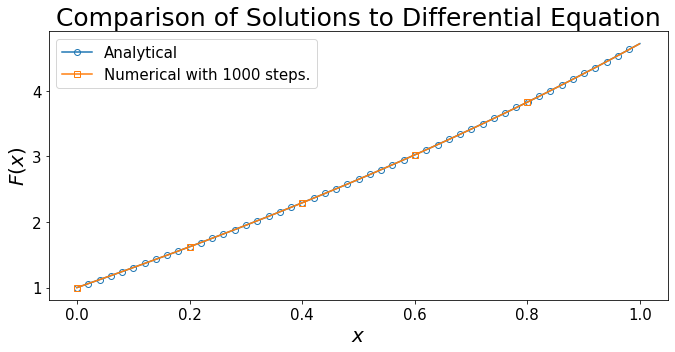

In [0]:
steps = 1000

x_arr = np.linspace(0,1, steps)

plt.figure(figsize=(10,5))

analytical_solution = np.multiply(2, x_arr) + np.exp(x_arr)

plt.plot(x_arr, analytical_solution, label='Analytical', markevery=20, marker='o', markerfacecolor='none')
plt.plot(test[0], test[1], markevery=200, marker= 's', markerfacecolor='none', label = 'Numerical with '+str(steps) + ' steps.')

plt.tick_params(axis='both', labelsize=15)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$F(x)$', fontsize=20)

plt.legend(loc='best', fontsize=15)

plt.title('Comparison of Solutions to Differential Equation', fontsize=25)

plt.tight_layout()

In [0]:
step_size_arr = np.arange(10,200+10, 10)

In [0]:
results = []

for n in step_size_arr:
  current_euler_for_n = euler(x0, f0, n)
  results.append(current_euler_for_n)

In [0]:
def F(x):
  return 2*x + np.exp(x)

In [0]:
errors = []

#we define error as abs (f(x_i) - F(x_i) ) / N

for i in range(len(step_size_arr)):
  #print('current step size: ', step_size_arr[i])
  curr_analytical_x = np.linspace(0,1, step_size_arr[i])
  curr_analytical = F(curr_analytical_x)
  curr_err = np.divide(np.abs(results[i][1] - curr_analytical), step_size_arr[i])
  errors.append(np.sum(curr_err))


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Numerical Integration Errors vs Step Size')

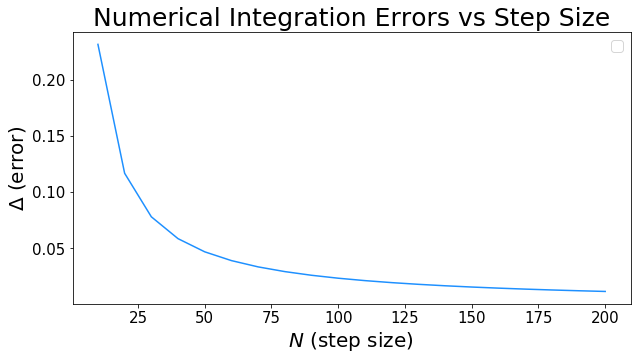

In [0]:
plt.figure(figsize=(10,5))


plt.plot(step_size_arr, errors, color='dodgerblue', linestyle='-')

plt.tick_params(axis='both', labelsize=15)
plt.xlabel(r'$N$ (step size) ', fontsize=20)
plt.ylabel(r'$\Delta$ (error)', fontsize=20)

plt.legend(loc='best', fontsize=15)

plt.title('Numerical Integration Errors vs Step Size', fontsize=25)


2. We want to find the position, as a function of time, of a damped harmonic oscillator. The equation of motion is

   $ m \frac{d^2x}{dt^2} = -kx – b\frac{dx}{dt}, \\ 
        x(0) = 0.5, \\ \frac{dx}{dt} |_{x=0} = 0$
    
This can be rearranged into:

$ \frac{d^2x}{dt^2} + \frac{b}{m} \frac{dx}{dt} + \frac{k}{m} x = 0$

${\displaystyle {\frac {\mathrm {d} ^{2}x}{\mathrm {d} t^{2}}}+2\zeta \omega _{0}{\frac {\mathrm {d} x}{\mathrm {d} t}}+\omega _{0}^{2}x=0,}$

Take m = 0.25 kg, k = 100 N/m, and b = 0.1 N.s/m.

Solve $x(t)$ for $t$ in the interval $[0, 10 \, T]$, where $T = \frac{2\pi}{\omega}, and $\omega^2 = \frac{k}{m}$.

Divide the interval into $N = 10^4$ intervals : $t_i = i \cdot h, i = 0, 1, 2, \cdots, N$, where $h = \frac{10 \,T}{N}$.


In [0]:
from IPython.display import display, Latex
from sympy import *
import IPython.display as disp

In [0]:
import sympy.printing as printing
init_printing(use_latex='matplotlib')

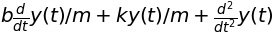

In [0]:
#attempt to solve it analytically
import sympy as sym
from sympy.abc import t

t, b, m, k = sym.symbols('t b m k ')
y = sym.Function('y')(t)
dydt = y.diff(t)

damped_oscillator = dydt.diff(t) + y.diff(t) * (b/m) + y*(k/m)
damped_oscillator

Solution to Damped Oscillator:


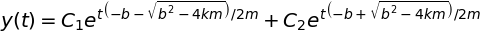

In [0]:
print('Solution to Damped Oscillator:')
solution_damped_oscillator= dsolve(damped_oscillator)
solution_damped_oscillator

In [0]:
a, d= sym.symbols('a d')
y_osc = a*exp((t/(2*m))*(- b - sqrt(b**2 - 4*k*m))) + d*exp((t/(2*m))*(- b + sqrt(b**2 - 4*k*m))) 
print('no derivative order:')
y_osc

no derivative order:


In [0]:
print('substitute:')
#b =0.1
#m = .25
#k = 100
numerical_y = y_osc.subs({b:0.1, m:.25, k:100})
numerical_y


substitute:


In [0]:
print('First Derivative:')
numerical_dydt = diff(numerical_y, t,1)
numerical_dydt

First Derivative:


In [0]:
system = [numerical_y, numerical_dydt]
system

In [0]:
ics = {numerical_y.subs(t,0): .5, numerical_dydt.subs(t,0) : 0}
ics


In [0]:
sym.nonlinsolve([numerical_y.subs(t,0) - .5, numerical_dydt.subs(t,0)], (a, d))

In [0]:
#This too again it's the euler method, albeit a higher level for it is a second derivative 

mass = .25
k = 100
b = 0.1

omega = np.sqrt(np.divide(k,mass))

period_osc = np.divide(2*np.pi, omega)

max_osc_time = 10*period_osc

num_steps = 10**4

h = 10 * (period_osc / num_steps)

x_arr = np.zeros(num_steps)
xdot_arr = np.zeros(num_steps)
xddot_arr = np.zeros(num_steps)
t = np.zeros(num_steps)

#seed initial conditions
x_arr[0] = 0.5
xdot_arr[0] = 0
xddot_arr[0] = -(k/mass)*x_arr[0] - (b/mass)*xdot_arr[0]
t[0] = 0

#this is an euler to the second order

for i in range(1, num_steps):
  #keep track of the second derivative
  #this is the value that drives the numerical integration

  xddot_arr[i] = -(k/mass)*x_arr[i-1] - (b/mass)*xdot_arr[i-1]
  
  #this is the first order derivative
  xdot_arr[i] = xdot_arr[i-1] + h*xddot_arr[i]
  
  #keep track of the position 
  x_arr[i] = x_arr[i-1] + h*xdot_arr[i-1]
  
  #keep track of the time 
  t[i] = t[i-1] + h
  


In [0]:
print(h)

0.0003141592653589793


No handles with labels found to put in legend.


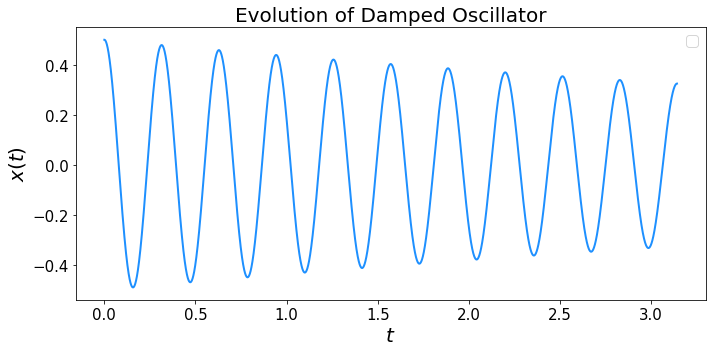

In [0]:
plt.figure(figsize=(10,5))

plt.plot(t, x_arr, color='dodgerblue',linewidth=2.0)

plt.tick_params(axis='both', labelsize=15)
plt.xlabel(r'$t$', fontsize=20)
plt.ylabel(r'$x(t)$', fontsize=20)

plt.legend(loc='best', fontsize=15)

"""

plt.subplot(122)
plt.plot(x_arr, xddot_arr, color='limegreen',linewidth=2.0)

plt.tick_params(axis='both', labelsize=15)
plt.xlabel(r'$x(t)$', fontsize=20)
plt.ylabel(r'$v(t) \, \frac{m}{s}$', fontsize=20)

plt.suptitle()
"""
plt.title('Evolution of Damped Oscillator', fontsize=20)
plt.tight_layout()

3. Construct and display a 5x5 matrix such that the first and last rows are ones, the first and last columns are ones, the central 3x3 matrix are all zeros except for the entry at the center of the matrix, which is five.

In [0]:
mat = np.ones((5,5))

for i in range(0, 5):
  for j in range(0, 5):
    if i > 0 and i < 4 and j > 0 and j < 4:
      if i == 2 and j == 2:
        mat[i][j] = 5
      else:
        mat[i][j] = 0

In [0]:
print('Resulting matrix:')
mat

Resulting matrix:


array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 5., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])